# Ejemplo 2. Diseño de Filtro Rechaza-Bandas por el Método del Enventanado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from numpy import pi

![Imagen](Img/respuesta_ideal.png)

In [2]:
#h1[n==0]=1-(wc)/np.pi # cuando es pasa--altas
#h1[n==0]=(wc2-wc1)/np.pi # cuando es pasabanda
#h1[n==0]=1-(wc2-wc1)/np.pi # cuando es rechazabanda

![imagen](Img/cuadro.png)

- Frecuencia de muestreo de 12 kHz
- Frecuencia de corte 1 de 1 kHz
- Frecuencia de corte 2 de 2 kHz
- Rizado de 0.3% permitido
- Ancho de banda de transición de 200 Hz

In [3]:
Fs = 12e3
Fc1 = 1e3
Fc2 = 2e3
fm = 200

Lo primero es calcular el rizado permitido en decibeles

In [4]:
ripple_dB = 20 * np.log10(0.3/100)
ripple_dB

-50.45757490560675

Según el resultado, debemos usar una ventana de Hamming o de Blackman para diseñar el filtro.

Para las cuatro ventanas del cuadro anterior se tiene la siguiente relación para M:

![imagen](Img/ventanas.png)

![Imagen](Img/func_ventanas.png)

In [5]:
def getM(ripple_dB, Fs, fm):
    M = 0
    if ripple_dB <= -74:
        M = 6*Fs/fm
    elif ripple_dB <= -44:
        M = 4*Fs/fm
    elif ripple_dB <= -21:
        M = 2*Fs/fm - 1
    if M % 2 == 0:
        M += 1
    return int(M)

In [6]:
M = getM(ripple_dB, Fs, fm)
print('Orden del filtro:', M)

Orden del filtro: 241


In [7]:
wc1 = 2*pi*Fc1/Fs # frecuencia de corte 1 normalizada en radianes
wc2 = 2*pi*Fc2/Fs # frecuencia de corte 2 normalizada en radianes
n = np.arange(-M//2+1, M//2+1) # Vector de muestras
hi = (wc1/pi) * np.sinc(wc1*n/pi) - (wc2/pi) * np.sinc(wc2*n/pi) # Respuesta del filtro ideal rechaza-bandas
hi[M//2] = 1 - (wc2-wc1)/pi
win = 0.54 - 0.46 * np.cos(2*pi*np.arange(len(n))/(M-1)) # Ventana de Hamming
h_n = hi*win # Multiplico la respuesta ideal por la ventana
w, h = sp.freqz(h_n, 1, whole=True, worN=2048) # Respuesta en frecuencia del filtro enventanado
print("Orden del filtro: ", M)

Orden del filtro:  241


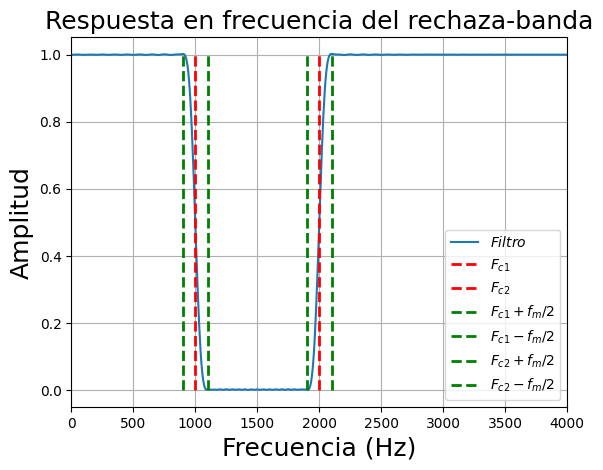

In [8]:
# Grafica
plt.figure()
plt.title('Respuesta en frecuencia del rechaza-banda', fontsize=18)
plt.plot((w-pi)*Fs/(2*pi),np.abs(np.fft.fftshift(h)), label='$Filtro$')
plt.vlines(Fc1, 0, 1, color='r', lw=2, linestyle='--', label='$F_{c1}$')
plt.vlines(Fc2, 0, 1, color='r', lw=2, linestyle='--', label='$F_{c2}$')
plt.vlines(Fc1+fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_{c1}+f_m/2$')
plt.vlines(Fc1-fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_{c1}-f_m/2$')
plt.vlines(Fc2+fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_{c2}+f_m/2$')
plt.vlines(Fc2-fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_{c2}-f_m/2$')
plt.xlabel('Frecuencia (Hz)', fontsize=18)
plt.ylabel('Amplitud', fontsize=18)
plt.xlim([0, 4000])
plt.legend(loc='lower right')
plt.grid()
plt.show()